In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from beamline34IDC.simulation.facade import Implementors
from beamline34IDC.simulation.facade.focusing_optics_factory import focusing_optics_factory_method
from beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
import beamline34IDC.optimization.common as opt_common
import beamline34IDC.optimization.movers as movers
from beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
#from beamline34IDC.util.redirect_shadow_output import redirected_output

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = 111

In [5]:
work_dir = '/Users/saugat/code/oasys/ML_Control_System/work_directory'
os.chdir(work_dir)
input_beam_path = "primary_optics_system_beam.dat"
#input_beam = load_shadow_beam()

In [6]:
fig_save_path = 'figures/other_tests/'

In [7]:
if not os.path.isdir(fig_save_path):
    print("Fig save directory does not exist. Trying to create.")
    os.mkdir(fig_save_path)

In [14]:
move_motors = ['vkb_4', 'hkb_4']

In [120]:
# Focusing Optics System -------------------------
#with redirected_output():
focusing_system, out_beam = opt_common.reinitialize(input_beam_path=input_beam_path)

In [65]:
translations = np.random.uniform(-0.14, 0.14, size=2)

In [100]:
translations

array([ 0.12098804, -0.13509765])

In [128]:
focusing_system.perturbate_input_photon_beam(shift_v=-0.07, shift_h=-0.05)

In [134]:
gp_opt_trial.focusing_system.get_vkb_motor_4_translation()

-0.0021767232835210107

In [135]:
gp_opt_trial.focusing_system.get_hkb_motor_4_translation()

-0.08371656670126189

In [129]:
gp_opt_trial = opt_common.OptimizationCommon(focusing_system, motor_types=move_motors, random_seed=DEFAULT_RANDOM_SEED)

In [136]:
opt_in_beam = gp_opt_trial.getBeam()

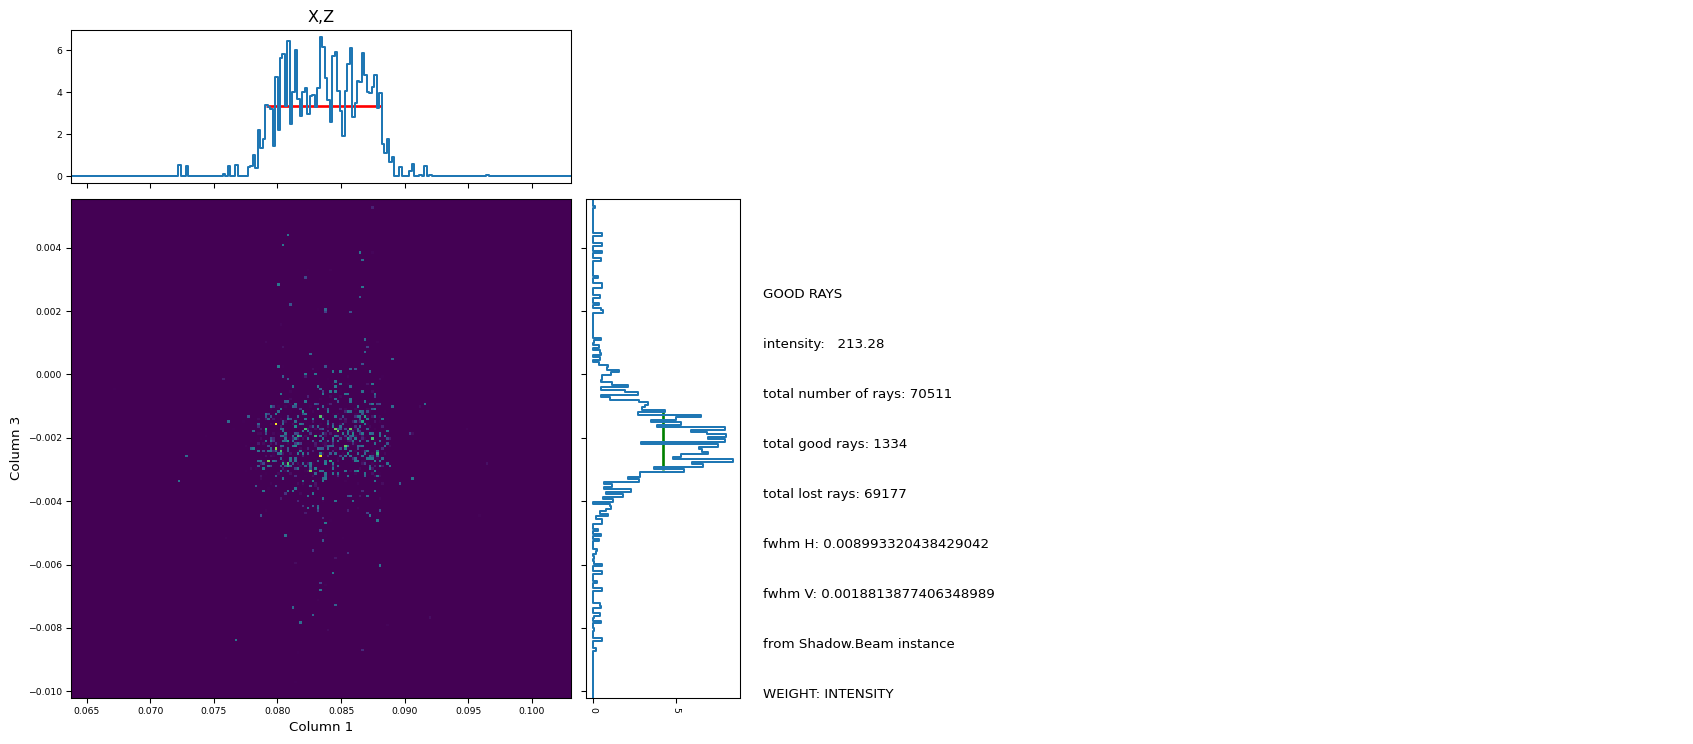

In [137]:
_ = plot_shadow_beam_spatial_distribution(opt_in_beam)

In [132]:
gp_opt_trial.setGaussianProcessOptimizer(bounds=[[-0.2, 0.2],[-0.2,0.2]], n_calls=100, random_state=123,
                                         x0=results[0].x_iters, y0=results[0].func_vals)

In [133]:
%%time
results, guesses, solutions, success = gp_opt_trial.trials(n_guesses=1, verbose=True)

motors ['vkb_4', 'hkb_4'] trans [0. 0.] current loss 9.936193009882241e-05
Initial loss is 9.936193009882241e-05
motors ['vkb_4', 'hkb_4'] trans [ 0.08518213 -0.02861163] current loss 0.08960436994440764
motors ['vkb_4', 'hkb_4'] trans [0.07635394 0.08766012] current loss 0.11577966840563698
motors ['vkb_4', 'hkb_4'] trans [-0.00355243  0.1120111 ] current loss 0.11149032050755829
motors ['vkb_4', 'hkb_4'] trans [-0.03563025  0.03187772] current loss 0.04747633185790948
motors ['vkb_4', 'hkb_4'] trans [-0.14401969 -0.03959298] current loss 0.15041573695734245
motors ['vkb_4', 'hkb_4'] trans [ 0.0509268  -0.07033964] current loss 0.08675898405295687
motors ['vkb_4', 'hkb_4'] trans [-0.10209629  0.07790207] current loss 0.12779086744229415
motors ['vkb_4', 'hkb_4'] trans [0.03756096 0.05271681] current loss 0.06446357103946318
motors ['vkb_4', 'hkb_4'] trans [-0.02389713 -0.16650941] current loss 0.16766047361330394
motors ['vkb_4', 'hkb_4'] trans [ 0.08493207 -0.0288546 ] current loss 0

KeyboardInterrupt: 

In [54]:
solutions

[-0.010252780790396127, 0.07350543829274925]

In [57]:
opt_out_beam = gp_opt_trial.getBeam()

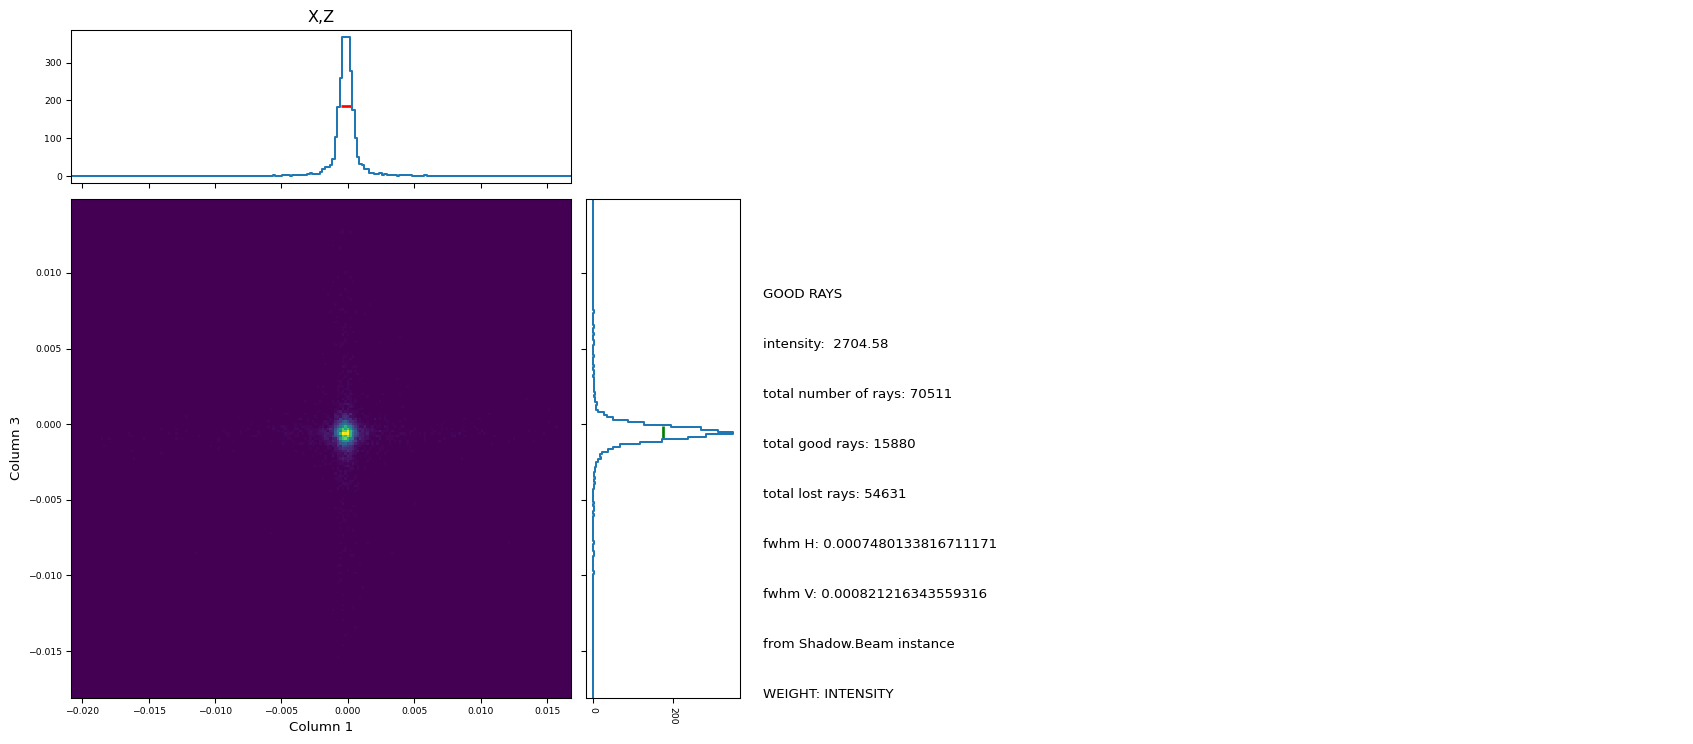

In [58]:
_ = plot_shadow_beam_spatial_distribution(opt_out_beam)

In [13]:
initial_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in initial_out_beams]
initial_hists, initial_dws = zip(*initial_hists_dws)

In [14]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [15]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [16]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

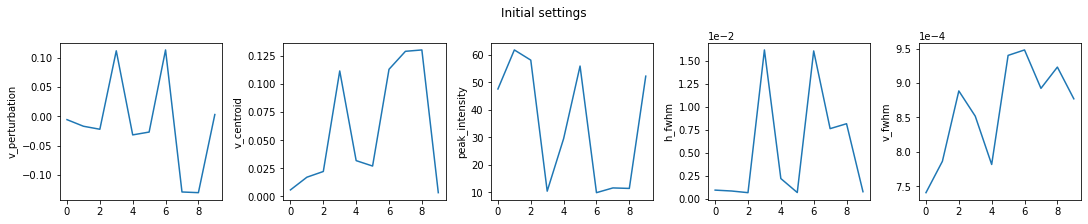

In [17]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('v_perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/hkb_4_initial_metrics.png', bbox_inches='tight')

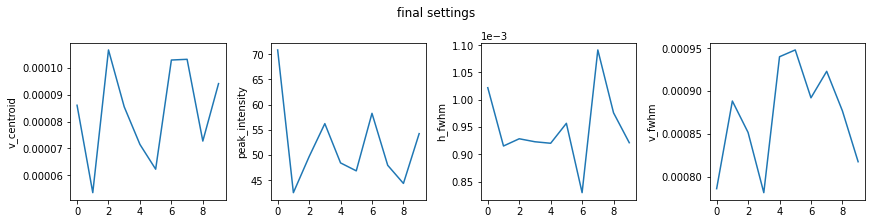

In [18]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/hkb_4_final_metrics.png', bbox_inches='tight')

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


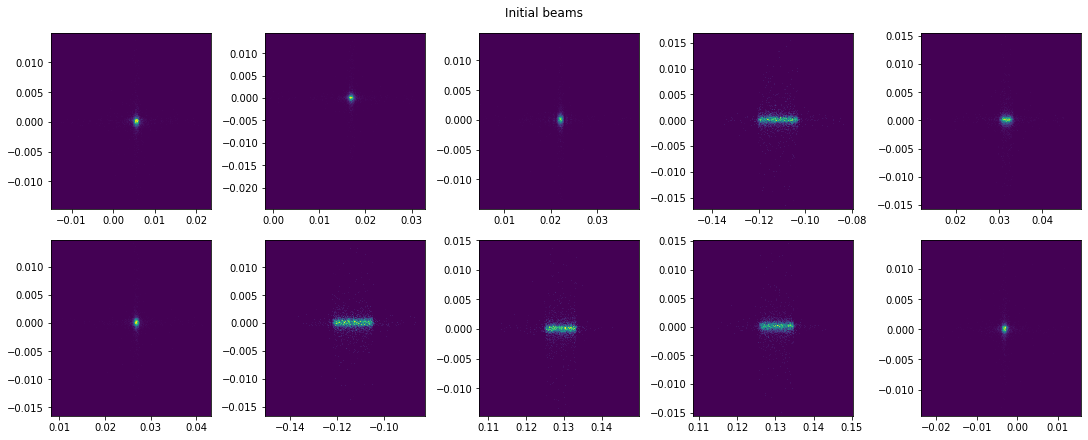

In [19]:
fig, axes = plt.subplots(2, 5, figsize=[15,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D.T)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/hkb_4_initial_beams.png', bbox_inches='tight')

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


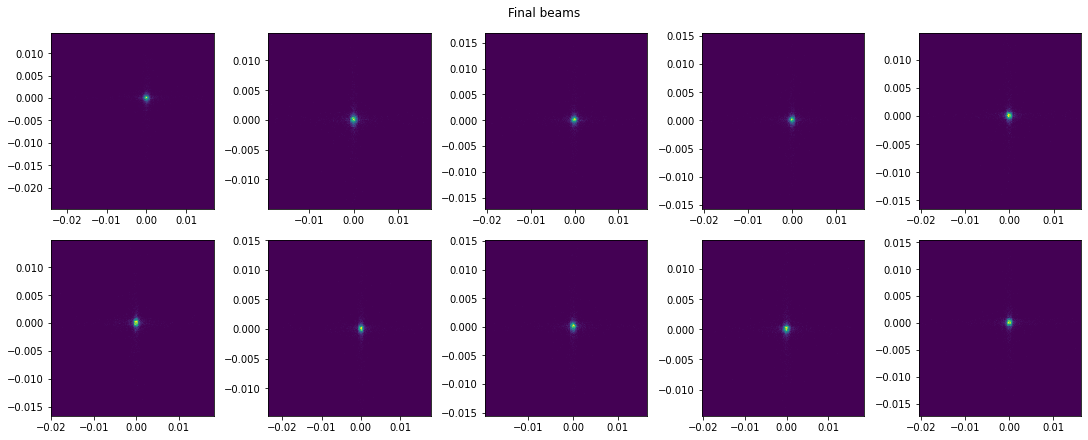

In [20]:
fig, axes = plt.subplots(2, 5, figsize=[15,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D.T)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/hkb_4_final_beams.png', bbox_inches='tight')

In [21]:
clean_up()